In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/solar_weather.csv')
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [5]:
df.describe(include='all')

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,NaN,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,NaN,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000


datetime

In [6]:
df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('Time', axis='columns')
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196776 entries, 2017-01-01 00:00:00 to 2022-08-31 17:45:00
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Energy delta[Wh]        196776 non-null  int64  
 1   GHI                     196776 non-null  float64
 2   temp                    196776 non-null  float64
 3   pressure                196776 non-null  int64  
 4   humidity                196776 non-null  int64  
 5   wind_speed              196776 non-null  float64
 6   rain_1h                 196776 non-null  float64
 7   snow_1h                 196776 non-null  float64
 8   clouds_all              196776 non-null  int64  
 9   isSun                   196776 non-null  int64  
 10  sunlightTime            196776 non-null  int64  
 11  dayLength               196776 non-null  int64  
 12  SunlightTime/daylength  196776 non-null  float64
 13  weather_type            196776 non-null 

In [ ]:
df.timestamp.dt.date

In [7]:
day = 60 * 60 * 24
year = 365.2425 * day

Why Use Sine and Cosine for Cyclical Features?

Capture periodicity: Sine and cosine functions are periodic, making them suitable for representing cyclical patterns.
Dimensionality reduction: Instead of using multiple categorical features for time-related information (e.g., day of week, month, year), sine and cosine can capture this information in just two dimensions.
Continuous representation: Sine and cosine values are continuous, which can be beneficial for some machine learning algorithms.

In [8]:
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,...,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483229e+09,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483230e+09,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483231e+09,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483232e+09,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,...,450,0.0,4,1,1,1.483232e+09,2.588190e-01,0.965926,0.011081,0.999939


In [9]:
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.011081,0.999939


split data for training and testing

In [10]:
train_count = round(0.8 * len(df))
val_count = round(0.9 * len(df))

In [11]:
df_train = df[:train_count]
df_val = df[train_count:val_count]
df_test = df[val_count:]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
WINDOW_SIZE = 20

function to make it time series ready and extracr target

In [14]:
def df_to_data1(df, window_size=5):
    data = scaler.fit_transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()

    X = []
    y = []

    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])

    return np.array(X), np.array(y)

In [15]:
def df_to_data2(df, window_size=5):
    data = scaler.transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()

    X = []
    y = []

    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])

    return np.array(X), np.array(y)

apply the functions to it

In [16]:
X_train, y_train = df_to_data1(df_train, window_size=WINDOW_SIZE)
X_val, y_val = df_to_data2(df_val, window_size=WINDOW_SIZE)
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [22]:
model = models.Sequential([
    layers.LSTM(64, input_shape=(WINDOW_SIZE, X_train.shape[2]), return_sequences=False),
    layers.Dense(128),
    layers.ReLU(),
    layers.Dense(256),
    layers.ReLU(),
    layers.Dense(512),
    layers.ReLU(),
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.01),  # Correctly using LeakyReLU layer
    layers.Dropout(0.1),
    layers.Dense(1, activation='linear')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [24]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 124s 24ms/step - loss: 207788.2500 - mae: 201.3787 - mse: 207788.2500 - val_loss: 80450.5391 - val_mae: 116.8003 - val_mse: 80450.5391
Epoch 2/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 125s 21ms/step - loss: 101593.4219 - mae: 138.6612 - mse: 101593.4219 - val_loss: 83955.2891 - val_mae: 116.2804 - val_mse: 83955.2891
Epoch 3/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 144s 21ms/step - loss: 98860.0547 - mae: 134.5869 - mse: 98860.0547 - val_loss: 76173.9922 - val_mae: 111.3050 - val_mse: 76173.9922
Epoch 4/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 134s 20ms/step - loss: 96182.5000 - mae: 131.5198 - mse: 96182.5000 - val_loss: 77201.0625 - val_mae: 111.6327 - val_mse: 77201.0625
Epoch 5/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 105s 21ms/step - loss: 95226.9688 - mae: 131.1718 - mse: 95226.9688 - val_loss: 88936.5625 - val_mae: 120.0288 - val_mse: 88936.5625
Epoch 6/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 146s 22ms/step - loss: 91581.2891 - mae: 127.5807 - mse: 91581.2891 - val_loss:

analyze perfomance

In [25]:
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions = np.hstack(predictions)
    plt.plot(y[start:end], label='Actual')
    plt.plot(predictions[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)

615/615 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step
MSE 146547.77
MAE 156.70
SignificanceResult(statistic=0.9356484539232256, pvalue=0.0)


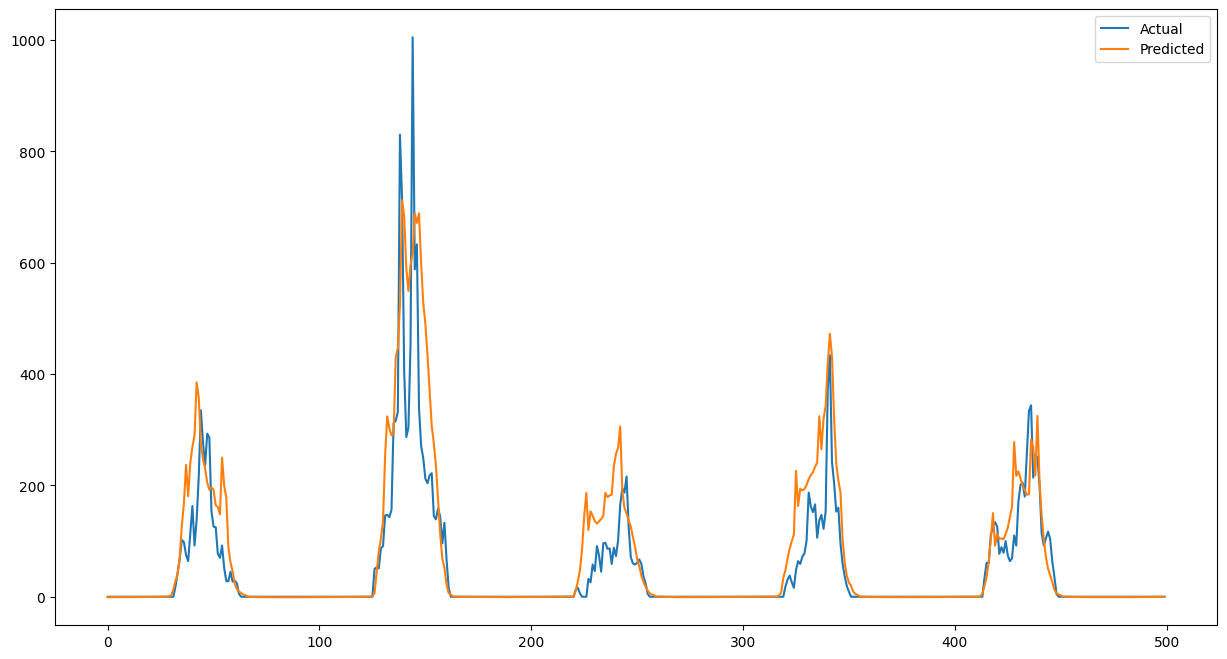

In [28]:
plt.figure(figsize=(15,8))
plotPredictions(X_test, y_test, start=0, end=500)